In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns; sns.set_style('darkgrid')
import pandas as pd

In [2]:
def calculate_pvalues(df):
    
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(sts.pearsonr(df[r], df[c])[1], 4)
    return pvalues
    


def corr(n, samplesize=100):
    
    #generate n radom variables
    r_variables = {}
    k = 0
    while k < n:  
        key = 'v' + str(k)
        nums = np.random.sample(10)*100
        r_variables[key] = nums 
        k += 1
    r_variables = pd.DataFrame(r_variables)
    
    # calculate stats for all variables
    rs = r_variables.corr()
    ps = calculate_pvalues(r_variables)

    output = pd.DataFrame({'R':rs, 'pval':ps})
    
    return output

def lin(n, samplesize=100):
    
    rs = np.array([])
    ps = np.array([])
    
    for i in range(n):
        X = np.random.sample(samplesize)
        Y = np.random.sample(samplesize)
        l = sts.linregress(X,Y)
        rs = np.append(rs, l.rvalue)
        ps = np.append(ps, l.pvalue)
        
    return rs, ps

In [14]:
r,p = lin(10000)

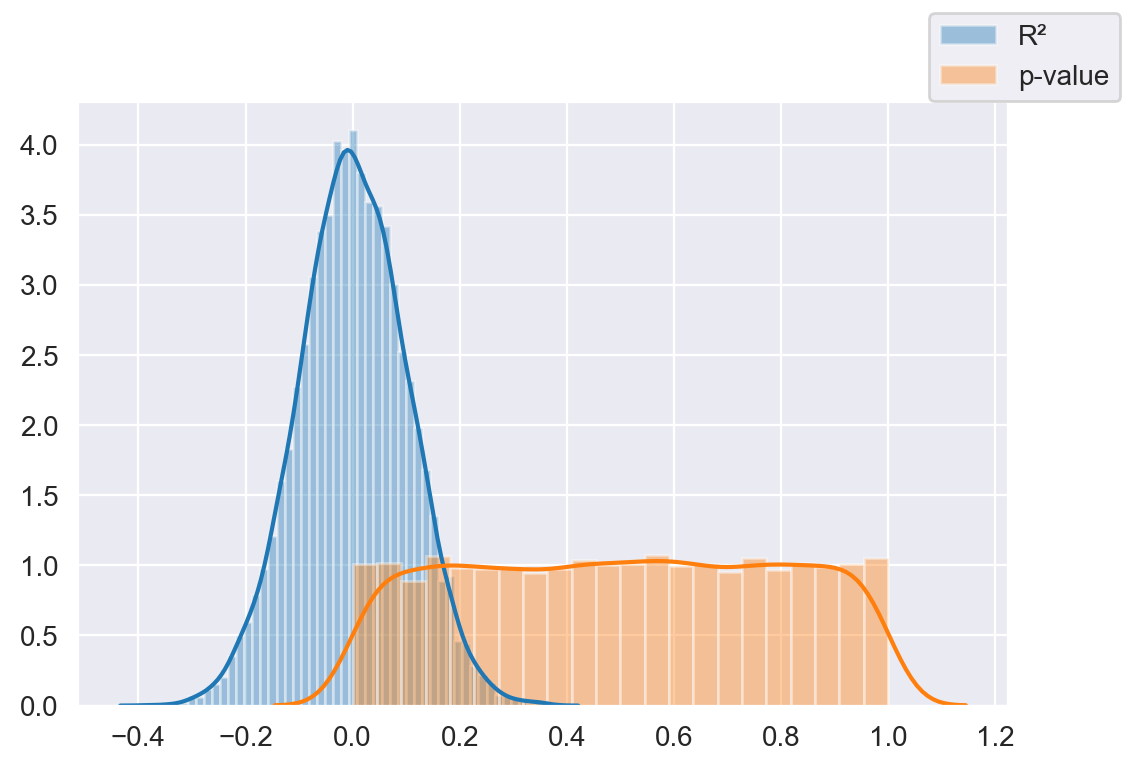

In [15]:
f, a = plt.subplots(dpi=200)

sns.distplot(r, label='R²', ax=a)
sns.distplot(p, label='p-value', ax=a)

f.legend()